In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('data/311-service-requests.csv')
data.head()

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [4]:
data.shape

(111069, 52)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
Unique Key                        111069 non-null int64
Created Date                      111069 non-null object
Closed Date                       60270 non-null object
Agency                            111069 non-null object
Agency Name                       111069 non-null object
Complaint Type                    111069 non-null object
Descriptor                        110613 non-null object
Location Type                     79022 non-null object
Incident Zip                      98807 non-null object
Incident Address                  84441 non-null object
Street Name                       84432 non-null object
Cross Street 1                    84728 non-null object
Cross Street 2                    84005 non-null object
Intersection Street 1             19364 non-null object
Intersection Street 2             19366 non-null object
Address Type                      102247 non

In [6]:
data['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Illegal Parking', 'Noise - Commercial',
       'Noise - Vehicle', 'Rodent', 'Blocked Driveway',
       'Noise - House of Worship', 'Street Light Condition',
       'Harboring Bees/Wasps', 'Taxi Complaint', 'Homeless Encampment',
       'Traffic Signal Condition', 'Food Establishment', 'Noise - Park',
       'Broken Muni Meter', 'Benefit Card Replacement',
       'Sanitation Condition', 'ELECTRIC', 'PLUMBING', 'HEATING',
       'GENERAL CONSTRUCTION', 'Street Condition', 'Consumer Complaint',
       'Derelict Vehicles', 'Noise', 'Drinking', 'Indoor Air Quality',
       'Panhandling', 'Derelict Vehicle', 'Lead', 'Water System',
       'Noise - Helicopter', 'Homeless Person Assistance',
       'Root/Sewer/Sidewalk Condition', 'Sidewalk Condition', 'Graffiti',
       'DOF Literature Request', 'Animal in a Park',
       'Overgrown Tree/Branches', 'Air Quality', 'Dirty Conditions',
       'Water Quality', 'Other Enforcement', 'Collection Truck Noise',
     

In [15]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(*args, **kwargs)
    Get or set the current tick locations and labels of the x-axis.
    
    Call signatures::
    
        locs, labels = xticks()           # Get locations and labels
    
        xticks(locs, [labels], **kwargs)  # Set locations and labels
    
    Parameters
    ----------
    locs : array_like
        A list of positions at which ticks should be placed. You can pass an
        empty list to disable xticks.
    
    labels : array_like, optional
        A list of explicit labels to place at the given *locs*.
    
    **kwargs
        :class:`.Text` properties can be used to control the appearance of
        the labels.
    
    Returns
    -------
    locs
        An array of label locations.
    labels
        A list of `.Text` objects.
    
    Notes
    -----
    Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
    equivalent of calling `~.Axes.get_xticks` and `~.Axes.get_xtick

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
Name: Complaint Type, dtype: int64


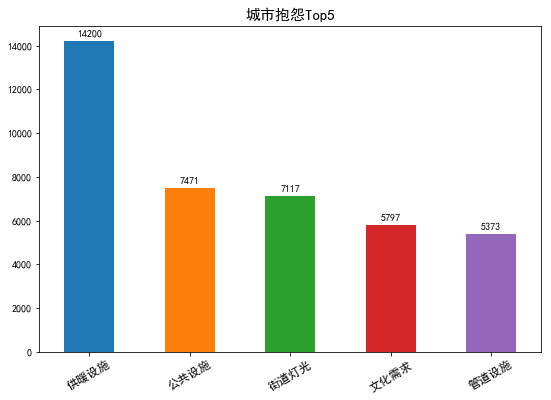

In [32]:
plt.rcParams['font.sans-serif'] = ['SimHei']
complaint=data['Complaint Type'].value_counts()[:5]
print(complaint)
plt.figure(figsize=(9,6))
complaint.plot(kind='bar')
ticks = ['供暖设施','公共设施','街道灯光','文化需求','管道设施']
plt.xticks(range(0,5),ticks,rotation=30,fontsize=12)
plt.title('城市抱怨Top5',fontsize=15)
for a,b in zip(range(0,5),list(complaint)):
    plt.text(a,b+200,str(b),fontsize=10,horizontalalignment='center')
plt.savefig('image/城市抱怨Top5.png',dpi=500)